In [145]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from datetime import datetime 
from sympy import *
from matplotlib.dates import DateFormatter
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from collections import Counter
from numpy import inf

In [146]:
# data visualization
data = pd.read_csv("temp_datalab_records_linkedin_company.csv", low_memory = False)
data = data[['company_name',"followers_count","employees_on_platform",'industry',"date_updated","date_added"]]
data = data.dropna(axis = 0)
data.describe()
print('Data dimension:',data.shape)
print('Number if industries:',len(np.unique(data.industry.astype(str))))
print('Industies:',np.unique(data.industry.astype(str)))

Data dimension: (2389931, 6)
Number if industries: 140
Industies: ['Accounting' 'Airlines/Aviation' 'Apparel & Fashion'
 'Apparel &amp; Fashion' 'Automotive' 'Aviation & Aerospace'
 'Aviation &amp; Aerospace' 'Banking' 'Biotechnology' 'Broadcast Media'
 'Building Materials' 'Business Supplies and Equipment' 'Capital Markets'
 'Chemicals' 'Civil Engineering' 'Commercial Real Estate'
 'Computer & Network Security' 'Computer &amp; Network Security'
 'Computer Games' 'Computer Hardware' 'Computer Networking'
 'Computer Software' 'Construction' 'Consumer Electronics'
 'Consumer Goods' 'Consumer Services' 'Cosmetics' 'Dairy'
 'Defense & Space' 'Defense &amp; Space' 'Design' 'E-Learning'
 'Education Management' 'Electrical/Electronic Manufacturing'
 'Entertainment' 'Environmental Services' 'Events Services'
 'Executive Office' 'Facilities Services' 'Farming' 'Financial Services'
 'Fine Art' 'Food & Beverages' 'Food &amp; Beverages' 'Food Production'
 'Furniture' 'Gambling & Casinos' 'Gambling

In [147]:
# feature extraction industrial yearly increasing rate:

shrinked_updated_date=[]
for dataset in data.date_updated:
    dataset=dataset[0:7]
    shrinked_updated_date.append(dataset)
data['shrinked_updated_date']=shrinked_updated_date

count=0
my_dict5={}
my_dict6={}
my_dict7={}

cleanedList = [x for x in data.industry.unique() if x == x]
print(len(cleanedList))

for industry in cleanedList:
    print(industry)
    count=count+1
    print(count)

    temp1=data[data.industry==industry]
    #print(temp1['industry'].get(temp1['industry'].keys()[0]))
    industry_name=temp1['industry'].get(temp1['industry'].keys()[0])
    
    comp_dates=[]
    for date in temp1['date_updated']:
        date = date[0:7]
        comp_dates.append(date)

    #print(np.unique(np.array(comp_dates)))
    #print(comp_dates)
    
    followerC=[]
    employeeC=[]
    shrink_dates=[]
    for date in np.unique(np.array(comp_dates)):
        #print(date)
        #print(temp1.date_updated)
        shrink_dates.append(date)
        
        temp2=temp1[temp1.shrinked_updated_date==date]
        followerC.append(str(int(np.mean(temp2['followers_count']))))
        employeeC.append(str(int(np.mean(temp2['employees_on_platform']))))
    
    followerC_rate=np.zeros(len(followerC))
    employeeC_rate=np.zeros(len(employeeC))
    follower_feature=np.zeros(len(followerC)-1)
    employee_feature=np.zeros(len(employeeC)-1)
    
    #print(range(len(followerC)-1))
    for i in range(len(followerC)-1):
       # print(i)
        follower_feature[i]=np.divide(np.subtract(int(followerC[i+1]),int(followerC[i])),int(followerC[i]))
        employee_feature[i]=np.divide(np.subtract(int(employeeC[i+1]),int(employeeC[i])),int(employeeC[i]))
    
    my_dict5[industry]=follower_feature
    my_dict6[industry]=employee_feature
    my_dict7[industry]=shrink_dates
        

140
Investment Banking
1
Aviation & Aerospace
2
Pharmaceuticals
3
Retail
4
Hospital & Health Care
5
Banking
6
Information Technology and Services
7
Computer Networking
8
Electrical/Electronic Manufacturing
9
Internet
10
Tobacco
11
Semiconductors
12
Oil & Energy
13
Automotive
14
Entertainment
15
Consumer Goods
16
Mining & Metals
17
Restaurants
18
Chemicals
19
Consumer Electronics
20
Financial Services
21
Mechanical or Industrial Engineering
22
Real Estate
23
Utilities
24
Biotechnology
25
Food & Beverages
26
Telecommunications
27
Research
28
Wine and Spirits
29
Media Production
30
Wireless
31
Computer Software
32
Transportation/Trucking/Railroad
33
Computer Games
34
Health, Wellness and Fitness
35
Defense & Space
36
Insurance
37
Sporting Goods
38
Medical Devices
39
Machinery
40
Airlines/Aviation
41
Leisure, Travel & Tourism
42
Food Production
43
Hospitality
44
Human Resources
45
Environmental Services
46
Dairy
47
Apparel & Fashion
48
Package/Freight Delivery
49
Construction
50
Investment

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in true_divide


Program Development
133
International Trade and Development
134
Medical Practice
135
Law Practice
136
Nonprofit Organization Management
137
Graphic Design
138


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: divide by zero encountered in true_divide


Photography
139
Market Research
140


In [148]:
# data test
print(my_dict5['Banking'])
print(my_dict6['Banking'])
print(my_dict7['Banking'])
#print(my_dict6.keys())

[-6.76346396e-02  2.12935007e-02  3.74801020e-02  4.21076919e-04
 -5.24856145e-02 -9.70255880e-01  3.30898118e+01 -2.81388217e-01
 -7.85849695e-03  3.69774920e-02 -3.50582410e-02 -4.23912312e-01
 -1.36836879e-01 -2.63685884e-01 -3.72705342e-01 -2.08292129e-01
 -1.23982235e-01  3.59104351e-02 -6.01039967e-02 -3.79671313e-04
  2.04015193e-02  2.83951930e-02  1.23578077e-02  1.96639256e-02
  1.99859748e-02 -2.26882090e-02 -4.17064469e-03  6.07528509e-02
  4.95195509e-02  2.29343244e-02  3.74850459e-02  2.42152466e-02
  5.42907180e-02  1.31308337e-02]
[-2.78701435e-02  5.84184707e-02  1.67113152e-02 -1.58511083e-02
 -6.67204964e-02 -9.60634762e-01  2.34794679e+01 -2.85646781e-01
 -2.50041343e-02  4.07069439e-02 -6.42784967e-02 -4.38150974e-01
 -1.39624279e-01 -3.62182028e-01 -3.58716529e-01 -2.05778717e-01
 -1.18677906e-01  3.32242638e-02 -6.33373934e-02 -7.28218466e-03
  1.10034058e-02  2.46177766e-02  0.00000000e+00  5.81689428e-03
  1.10636158e-02  1.07187267e-01  3.81850854e-02  4.9978

In [149]:
# fill in empty features
full_dates=my_dict7['Banking']
full_dates=full_dates[1:]
print((full_dates))
full_dict5={}
full_dict6={}
full_dict7={}

for key in my_dict7.keys():
    temp7=my_dict7.get(key)
    #print(len(temp3))
    if len(temp7)>1:
        temp7=temp7[1:]
    else: continue
        
    temp6=my_dict6.get(key)
    temp5=my_dict5.get(key)
    #temp4=my_dict4.get(key)
   # print((temp4))
    
    T6=np.zeros(len(full_dates))
    T5=np.zeros(len(full_dates))
    #T4=[]#np.zeros(len(full_dates))
    #print(len(T1))
    
    #print(range(len(full_dates)-1))
    #print(temp3)

    for i in range(len(full_dates)):
        #print(i)
        if full_dates[i] in temp7:
            Ind=temp7.index(full_dates[i])
            #print(Ind)
            T6[i]=temp6[Ind]
            T5[i]=temp5[Ind]
            #print(temp4[Ind])
            #T4.append(temp4[Ind])
            
    full_dict5[key]=T5
    full_dict6[key]=T6
    #full_dict3[key]=T4
    
#print(len(full_dict1))
#print(full_dict1['Alcon'])
#print(list(full_dict1.values()))
#print((full_dict1.values()))
Y=np.concatenate((np.array(list(full_dict5.values())),np.array(list(full_dict6.values()))),axis=1)
Y1=np.array(list(full_dict5.values()))
Y2=np.array(list(full_dict6.values()))
print(Y.shape)
print(Y1.shape)
print(Y2.shape)
Y=np.nan_to_num(Y)
Y[Y >= 5000] = 0
print(np.multiply(np.mean(Y[129:130,0:34],axis=0),100))

['2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07']
(140, 68)
(140, 34)
(140, 34)
[   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            1.00502513 -100.            0.            0.
    0.            0.            0.            0.            0.
    0.           -2.78481013    1.82291667    2.81329923    0.
    0.            0.            0.            0.        ]


(140, 68)
['2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07']
[-9.62427041e+00  1.56904975e+00  5.49697087e-01 -3.54994161e+00
 -6.17682087e+00 -4.52534652e+01  4.73999455e+02  8.95170352e-01
 -2.67215758e+00  3.91160491e+00  2.86929210e-01 -1.25942924e+01
 -4.34225032e+00  1.16413358e+00 -2.86800541e+01 -3.91886502e+01
  2.05110010e+02  1.07462436e+01  7.17376137e-01  1.30253209e+00
  1.84641269e-02 -7.05321223e+00  1.10514190e-01  1.24803875e+00
  1.80774742e+00 -5.85565991e+00 -3.03673128e+00  9.68510169e+00
  7.76445930e+00  3.01412967e+00  2.35585254e+00  7.27401902e-01
  1.51113986e+00  6.81405166e-01]
[-2.23549159e-03  1.46999388e-02 -9.18250489e-03 -1.31037942e-02
 -1.595

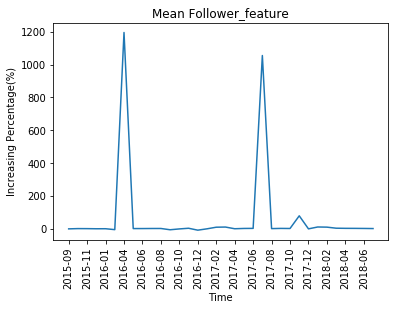

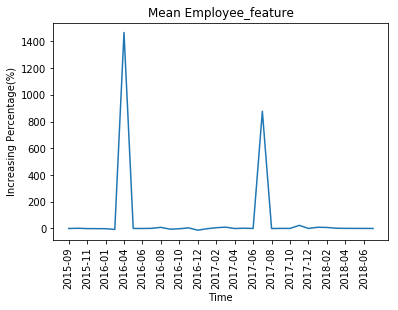

In [150]:
# data test
full_dates=my_dict7['Restaurants']
#full_dates=full_dates[1:]
Y=np.nan_to_num(Y)
print((Y.shape))
print(full_dates[1:])
print(np.multiply(np.mean(Y[3:5,0:34],axis=0),100))
print((np.mean(Y[:,34:],axis=0)))
plt.xticks(np.arange(len(full_dates), step=2),rotation='vertical')
plt.plot(full_dates,np.multiply(np.mean(Y[0:,0:34],axis=0),100))
plt.xlabel('Time')
plt.title('Mean Follower_feature')
plt.ylabel('Increasing Percentage(%)')
plt.show()
plt.xticks(np.arange(len(full_dates), step=2),rotation='vertical')
plt.plot(full_dates,np.multiply(np.mean(Y[0:,34:],axis=0),100))
plt.xlabel('Time')
plt.title('Mean Employee_feature')
plt.ylabel('Increasing Percentage(%)')
plt.show()

In [154]:
# clustering companies according to industrial yearly increasing rates of followers:
Y=np.nan_to_num(Y)
Y1=np.nan_to_num(Y1)
Y2=np.nan_to_num(Y2)
kmeans = KMeans(n_clusters=10,random_state=0)
kmeans.fit(Y)
y_kmeans = kmeans.predict(Y)
print(y_kmeans)
print(full_dates)

[9 9 3 9 9 5 9 9 9 9 9 7 9 9 9 9 9 9 8 9 4 9 9 5 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 5 5 9 9 2 9 9 9 9 9 5 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 0 9 9 9 9 9 9 9 9 9 1 9 9 9 9 9 9 6 9 9 9 9]
['2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07']


140
(1, 68)
['Gambling &amp; Casinos']


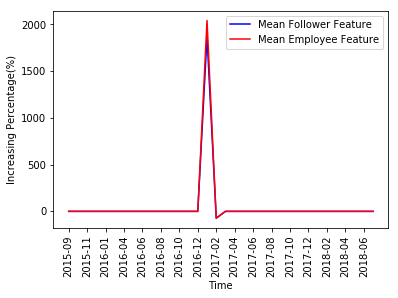

(1, 68)
['Fine Art']


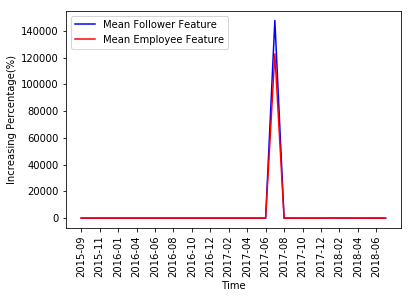

(1, 68)
['Hospitality']


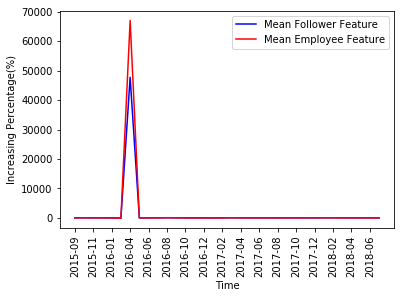

(1, 68)
['Pharmaceuticals']


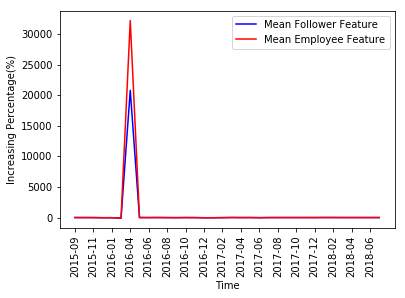

(1, 68)
['Financial Services']


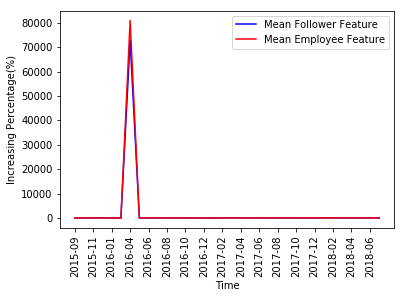

(5, 68)
['Airlines/Aviation' 'Banking' 'Construction' 'Machinery' 'Utilities']


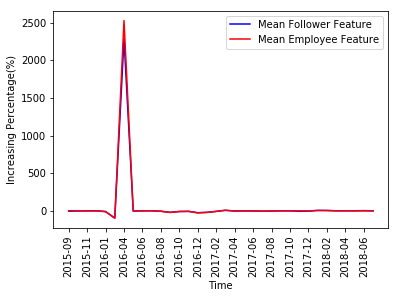

(1, 68)
['Law Practice']


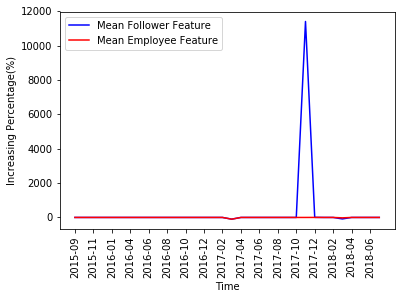

(1, 68)
['Semiconductors']


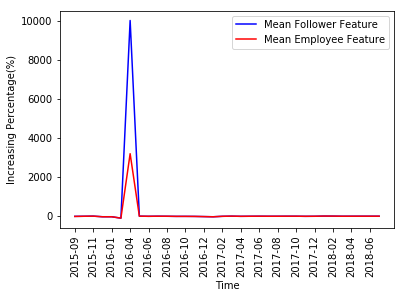

(1, 68)
['Chemicals']


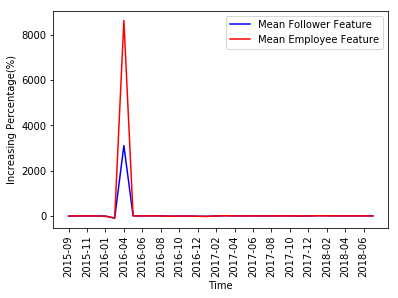

(127, 68)
['Accounting' 'Apparel & Fashion' 'Apparel &amp; Fashion' 'Automotive'
 'Aviation & Aerospace' 'Aviation &amp; Aerospace' 'Biotechnology'
 'Broadcast Media' 'Building Materials' 'Business Supplies and Equipment'
 'Capital Markets' 'Civil Engineering' 'Commercial Real Estate'
 'Computer & Network Security' 'Computer &amp; Network Security'
 'Computer Games' 'Computer Hardware' 'Computer Networking'
 'Computer Software' 'Consumer Electronics' 'Consumer Goods'
 'Consumer Services' 'Cosmetics' 'Dairy' 'Defense & Space'
 'Defense &amp; Space' 'Design' 'E-Learning' 'Education Management'
 'Electrical/Electronic Manufacturing' 'Entertainment'
 'Environmental Services' 'Events Services' 'Executive Office'
 'Facilities Services' 'Farming' 'Food & Beverages' 'Food &amp; Beverages'
 'Food Production' 'Furniture' 'Gambling & Casinos'
 'Glass, Ceramics & Concrete' 'Glass, Ceramics &amp; Concrete'
 'Government Administration' 'Graphic Design'
 'Health, Wellness and Fitness' 'Higher Educati

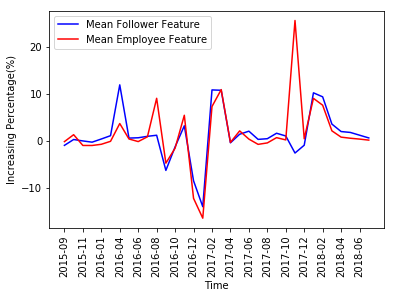

In [155]:
print(len(full_dict5.keys()))
Ukeys=np.array(full_dict5.keys())
#print((np.array(y_kmeans)))
y_kmeans=np.array(y_kmeans)
for vae in np.unique(y_kmeans):
    temp1=Y[y_kmeans==vae]
    print(temp1.shape)
    Ind = np.where(y_kmeans == vae)
    #print((Ind[0]))
    keyshere=[]
    for i in range(len(Ind[0])):
        tmp=list(Ukeys.tolist())[Ind[0][i]]
        keyshere.append(tmp)
    keysH=np.unique(keyshere)
    print(keysH)
    tmp2=[]
    cnt=0
    for key in keysH:
        cnt=cnt+1
        tmp0=(data[data.industry==key])
        #print(tmp0['industry'])
        tmp1 =(tmp0.company_name.values)
        #if cnt%10 == 0:
        #    print(cnt)
        tmp2.append(tmp1)
    #print(counts)
    
    plt.plot(full_dates,np.multiply(np.mean(temp1[:,0:34],axis=0),100),'b',label='Mean Follower Feature')
    #plt.plot(np.multiply(np.mean(temp1[:,0:],axis=0),100))
    #plt.axis([0.0,2.0,-200,200])4
   # plt.show()
    plt.plot(full_dates,np.multiply(np.mean(temp1[:,34:],axis=0),100),'r',label='Mean Employee Feature')
    plt.xticks(np.arange(len(full_dates), step=2),rotation='vertical')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Increasing Percentage(%)')
    #plt.axis([0.0,2.0,-200,200])
    plt.show()
   # print(temp1.shape)


In [48]:
# clustering companies according to industrial yearly increasing rates of followers:
Y=np.nan_to_num(Y)
Y1=np.nan_to_num(Y1)
Y2=np.nan_to_num(Y2)
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(Y2)
y_kmeans = kmeans.predict(Y2)
print(y_kmeans)
print(full_dates)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 3 0 0 0 2 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 3 3 3 0 3 0 0 0
 0 2 3 3 0 0 0 0 0 3 0 3 3 0 0 0 0 3 0 3 0 3 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3
 0 3 3 0 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
['2015', '2016', '2017', '2018']


137
['Accounting' 'Airlines/Aviation' 'Apparel & Fashion' 'Automotive'
 'Aviation & Aerospace' 'Banking' 'Biotechnology' 'Broadcast Media'
 'Business Supplies and Equipment' 'Chemicals' 'Civil Engineering'
 'Commercial Real Estate' 'Computer Games' 'Computer Hardware'
 'Computer Networking' 'Computer Software' 'Construction'
 'Consumer Electronics' 'Consumer Goods' 'Consumer Services' 'Cosmetics'
 'Defense & Space' 'Design' 'Education Management'
 'Electrical/Electronic Manufacturing' 'Entertainment'
 'Environmental Services' 'Facilities Services' 'Farming'
 'Financial Services' 'Food & Beverages' 'Gambling & Casinos'
 'Glass, Ceramics & Concrete' 'Health, Wellness and Fitness'
 'Hospital & Health Care' 'Hospitality' 'Human Resources'
 'Individual & Family Services' 'Industrial Automation'
 'Information Services' 'Information Technology and Services' 'Insurance'
 'Internet' 'Investment Banking' 'Leisure, Travel & Tourism'
 'Luxury Goods & Jewelry' 'Machinery' 'Management Consulting'
 '

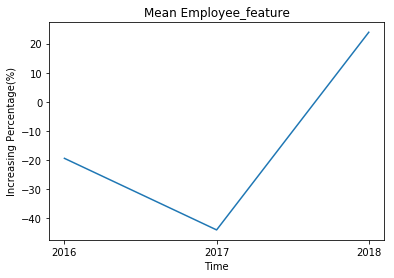

['Gambling &amp; Casinos']


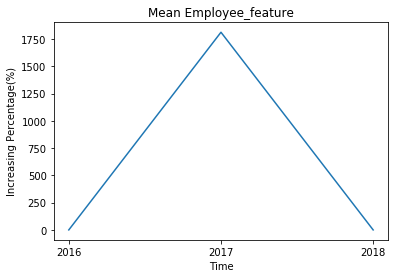

['Investment Management' 'Renewables & Environment']


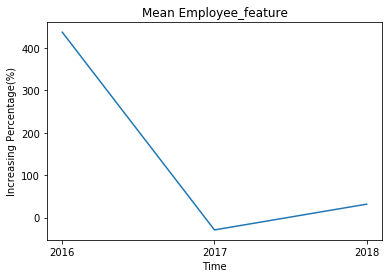

['Apparel &amp; Fashion' 'Aviation &amp; Aerospace' 'Building Materials'
 'Capital Markets' 'Computer & Network Security'
 'Computer &amp; Network Security' 'Dairy' 'Defense &amp; Space'
 'E-Learning' 'Events Services' 'Executive Office' 'Fine Art'
 'Food &amp; Beverages' 'Food Production' 'Furniture'
 'Government Administration' 'Graphic Design' 'Higher Education'
 'Hospital &amp; Health Care' 'International Trade and Development'
 'Law Enforcement' 'Law Practice' 'Legal Services'
 'Leisure, Travel &amp; Tourism' 'Logistics and Supply Chain'
 'Luxury Goods &amp; Jewelry' 'Maritime' 'Medical Practice' 'Military'
 'Mining &amp; Metals' 'Motion Pictures and Film' 'Music'
 'Nonprofit Organization Management' 'Oil &amp; Energy' 'Photography'
 'Professional Training & Coaching' 'Professional Training &amp; Coaching'
 'Program Development' 'Public Relations and Communications'
 'Public Safety' 'Railroad Manufacture' 'Ranching' 'Real Estate'
 'Recreational Facilities and Services' 'Renewables

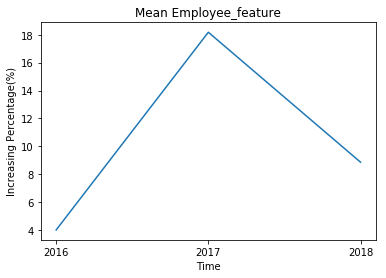

In [49]:
print(len(full_dict5.keys()))
Ukeys=np.array(full_dict5.keys())
#print((np.array(y_kmeans)))
y_kmeans=np.array(y_kmeans)
for vae in np.unique(y_kmeans):
    temp1=Y[y_kmeans==vae]
    Ind = np.where(y_kmeans == vae)
    #print((Ind[0]))
    keyshere=[]
    for i in range(len(Ind[0])):
        tmp=list(Ukeys.tolist())[Ind[0][i]]
        keyshere.append(tmp)
    keysH=np.unique(keyshere)
    print(keysH)
    tmp2=[]
    cnt=0
    for key in keysH:
        cnt=cnt+1
        tmp0=(data[data.industry==key])
        #print(tmp0['industry'])
        tmp1 =(tmp0.company_name.values)
        #if cnt%10 == 0:
        #    print(cnt)
        tmp2.append(tmp1)
    #print(counts)
    
    plt.plot(full_dates[1:],np.multiply(np.mean(temp1[:,3:],axis=0),100))
    plt.xlabel('Time')
    plt.title('Mean Employee_feature')
    plt.ylabel('Increasing Percentage(%)')
    #plt.axis([0.0,2.0,-200,200])
    plt.show()
   # print(temp1.shape)

Goldman Sachs
Deutsche Bank
Evercore
Greenhill & Co.
Moelis &amp; Company
Cowen and Company
Moelis & Company
Starwood Property Trust
Senior Housing Properties Trust (SNF)


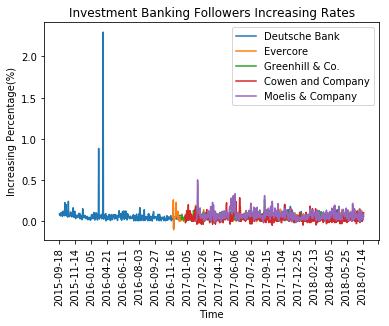

In [67]:
temp1=data[data.industry=='Investment Banking']
#print(temp1)

dates=[]
for date in temp1['date_updated']:
    date = date[0:10]
    dates.append(date)

plt.xticks(np.arange(len(dates), step=50),rotation='vertical')

for company in temp1.company_name.unique():
    print(company)
    if(temp1[temp1.company_name==company].count()[0]>500):  # only show six most frequently appeared companies as examples
        temp2=temp1[temp1.company_name==company]
        comp_dates=[]
        for date in temp2['date_updated']:
            date = date[0:10]
            comp_dates.append(date)
        start=min(comp_dates)
        stop=max(comp_dates)
#temp2
#temp1.company_name.unique()
        followerC=temp2['followers_count']
    
        # In order to compare increasing rates of different companies in parallel, 
        # the results were calculated as the increasing percentage over time
        
        plt.plot(comp_dates[1:],np.multiply(np.divide(np.diff(followerC),followerC[:len(followerC)-1]),100),label=company)
        
        plt.legend()
        plt.xlabel('Time')
        plt.title('Investment Banking Followers Increasing Rates')
        plt.ylabel('Increasing Percentage(%)')
        #plt.xaxis.set_ticks(np.arange(start.astype(int), stop.astype(int), (stop-start)/10))
        #plt.xaxis.set_major_formatter(myFmt); 
        #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
        #plt.xticks(np.arange((int(start)), (int(stop))+1, 100000.0))
        #plt.axis([0.0,688.0,0.2,1.05])
plt.show()

McDonald's Corporation
Yum! Brands
Pizza Hut
KFC
Taco Bell
Long John Silver's, LLC
The Habit Burger Grill
Chipotle Mexican Grill
Burger King Corporation
Del Taco LLC
Zoes Kitchen
Del Taco Restaurants Inc.
DineEquity
Applebee's
IHOP
Del Frisco's Restaurant Group
McDonald's
Jack in the Box
Brinker International
Fiesta Restaurant Group, Inc.
Pollo Tropical
Nathan's Famous, Inc.
Potbelly Sandwich Works
Ruth's Chris Steak House
Bahama Breeze
Darden
Eddie V's Restaurants Inc.
Longhorn Steakhouse
Olive Garden
Seasons 52 Restaurant
The Capital Grille
Yard House Restaurants
Famous Dave's of America
Noodles & Company
Sonic Drive-In
The Wendy's Company
Luby's Inc.
Cracker Barrel
Texas Roadhouse
Papa John's International
Red Robin
BJ's Restaurants, Inc.
The Cheesecake Factory
Noodles &amp; Company
Chanticleer Holdings, Inc.
Diversified Restaurant Holdigns, Inc (Nasdaq: SAUC)
Kona Grill
RAVE Restaurant Group, Inc.
Diversified Restaurant Holdings, Inc (Nasdaq: SAUC)
Applebee's Neighborhood Grill + B

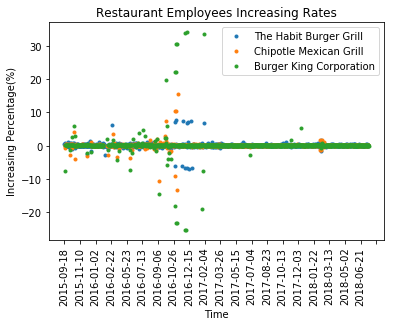

In [68]:
temp1=data[data.industry=='Restaurants']
#print(temp1)

dates=[]
for date in temp1['date_updated']:
    date = date[0:10]
    dates.append(date)

plt.xticks(np.arange(len(dates), step=50),rotation='vertical')

for company in temp1.company_name.unique():
    print(company)
    if(temp1[temp1.company_name==company].count()[0]>948):
        temp2=temp1[temp1.company_name==company]
        comp_dates=[]
        for date in temp2['date_updated']:
            date = date[0:10]
            comp_dates.append(date)
        start=min(comp_dates)
        stop=max(comp_dates[-100])
#temp2
#temp1.company_name.unique()
        followerC=temp2['employees_on_platform']
        plt.plot(comp_dates[1:],np.multiply(np.divide(np.diff(followerC),followerC[:len(followerC)-1]),100),'.',label=company)
        plt.legend()
        plt.xlabel('Time')
        plt.title('Restaurant Employees Increasing Rates')
        plt.ylabel('Increasing Percentage(%)')
        #plt.xaxis.set_ticks(np.arange(start.astype(int), stop.astype(int), (stop-start)/10))
        #plt.xaxis.set_major_formatter(myFmt); 
        #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
        #plt.xticks(np.arange((int(start)), (int(stop))+1, 100000.0))
        #plt.axis([0.0,688.0,0.2,1.05])
plt.show()

McDonald's Corporation
Yum! Brands
Pizza Hut
KFC
Taco Bell
Long John Silver's, LLC
The Habit Burger Grill
Chipotle Mexican Grill
Burger King Corporation
Del Taco LLC
Zoes Kitchen
Del Taco Restaurants Inc.
DineEquity
Applebee's
IHOP
Del Frisco's Restaurant Group
McDonald's
Jack in the Box
Brinker International
Fiesta Restaurant Group, Inc.
Pollo Tropical
Nathan's Famous, Inc.
Potbelly Sandwich Works
Ruth's Chris Steak House
Bahama Breeze
Darden
Eddie V's Restaurants Inc.
Longhorn Steakhouse
Olive Garden
Seasons 52 Restaurant
The Capital Grille
Yard House Restaurants
Famous Dave's of America
Noodles & Company
Sonic Drive-In
The Wendy's Company
Luby's Inc.
Cracker Barrel
Texas Roadhouse
Papa John's International
Red Robin
BJ's Restaurants, Inc.
The Cheesecake Factory
Noodles &amp; Company
Chanticleer Holdings, Inc.
Diversified Restaurant Holdigns, Inc (Nasdaq: SAUC)
Kona Grill
RAVE Restaurant Group, Inc.
Diversified Restaurant Holdings, Inc (Nasdaq: SAUC)
Applebee's Neighborhood Grill + B

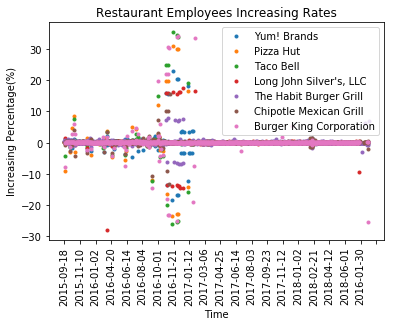

In [69]:
temp1=data[data.industry=='Restaurants']
#print(temp1)

dates = temp1['as_of_date']

plt.xticks(np.arange(len(dates), step=50),rotation='vertical')

for company in temp1.company_name.unique():
    print(company)
    if(temp1[temp1.company_name==company].count()[0]>947):
        temp2=temp1[temp1.company_name==company]
        comp_dates=temp2['as_of_date']
        start=min(comp_dates)
        stop=max(comp_dates)
#temp2
#temp1.company_name.unique()
        followerC=temp2['employees_on_platform']
        plt.plot(comp_dates[1:],np.multiply(np.divide(np.diff(followerC),followerC[:len(followerC)-1]),100),'.',label=company)
        plt.legend()
        plt.xlabel('Time')
        plt.title('Restaurant Employees Increasing Rates')
        plt.ylabel('Increasing Percentage(%)')
        #plt.xaxis.set_ticks(np.arange(start.astype(int), stop.astype(int), (stop-start)/10))
        #plt.xaxis.set_major_formatter(myFmt); 
        #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
        #plt.xticks(np.arange((int(start)), (int(stop))+1, 100000.0))
        #plt.axis([0.0,688.0,0.2,1.05])
plt.show()